<h2>Modul 5 Transfer Learning Tabular</h2>
Clarissa Sanindita Reikisyifa - 202010370311232

1. Import library yang diperlukan
2. Load Dataset
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan transfer learning dengan menggunakan model **TabNet** atau lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Lakukan predict pada data test hasil splitting kemudian lakukan perbandingan antara true label dan predict labelnya
9. Demonstrasikan hasil tersebut kepada esisten

### Import Library

In [144]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

### Load Dataset

In [145]:
df = pd.read_csv('income.csv')
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### Processing Data

In [147]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [148]:
df.duplicated().sum()

45

In [149]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [150]:
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)

Encoding Fitur Kategorikal

In [151]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

Normalisasi Fitur Numerik

In [152]:
scaler = StandardScaler()
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [153]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,2.150468,2,1.667967,10,2.302060,0,3,1,4,1,12.942883,-0.219507,1.589062,38,1
1,-1.625098,2,0.517617,2,-0.826542,4,7,3,4,1,-0.146424,-0.219507,-2.156461,38,0
2,-0.567940,2,-0.147165,9,1.128834,2,3,0,4,1,-0.146424,-0.219507,-0.075615,38,1
3,1.470866,5,-0.751523,5,-2.390843,2,13,0,4,1,-0.146424,-0.219507,-0.075615,38,0
4,-1.021007,5,-0.382791,15,-0.044392,4,7,1,2,1,-0.146424,-0.219507,-0.075615,38,0


### Spliting Feature & Label

In [154]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

### Spliting Train, Val, dan Test

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membangun Model

In [156]:
# Inisialisasi model TabNet (Anda mungkin perlu menyesuaikan parameter)
model = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                         optimizer_params=dict(lr=2e-2),
                         scheduler_params={"step_size":50, "gamma":0.9},
                         scheduler_fn=torch.optim.lr_scheduler.StepLR,
                         mask_type='entmax')  # Mask type bisa juga 'sparsemax'

c:\Users\ichaa\anaconda3\envs\modulML\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


### Training Model

In [157]:
model.fit(X_train.values, y_train.values, max_epochs=100, batch_size=1024, virtual_batch_size=128)

c:\Users\ichaa\anaconda3\envs\modulML\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.46784 |  0:00:01s
epoch 1  | loss: 0.3645  |  0:00:02s
epoch 2  | loss: 0.34538 |  0:00:04s
epoch 3  | loss: 0.33963 |  0:00:05s
epoch 4  | loss: 0.33878 |  0:00:07s
epoch 5  | loss: 0.33466 |  0:00:08s
epoch 6  | loss: 0.33046 |  0:00:10s
epoch 7  | loss: 0.33091 |  0:00:11s
epoch 8  | loss: 0.33013 |  0:00:13s
epoch 9  | loss: 0.32712 |  0:00:15s
epoch 10 | loss: 0.32532 |  0:00:16s
epoch 11 | loss: 0.325   |  0:00:18s
epoch 12 | loss: 0.32317 |  0:00:19s
epoch 13 | loss: 0.32328 |  0:00:21s
epoch 14 | loss: 0.32335 |  0:00:22s
epoch 15 | loss: 0.32338 |  0:00:24s
epoch 16 | loss: 0.32408 |  0:00:26s
epoch 17 | loss: 0.32019 |  0:00:27s
epoch 18 | loss: 0.32068 |  0:00:29s
epoch 19 | loss: 0.31985 |  0:00:30s
epoch 20 | loss: 0.31826 |  0:00:32s
epoch 21 | loss: 0.31862 |  0:00:33s
epoch 22 | loss: 0.3195  |  0:00:35s
epoch 23 | loss: 0.31739 |  0:00:36s
epoch 24 | loss: 0.31686 |  0:00:38s
epoch 25 | loss: 0.31524 |  0:00:39s
epoch 26 | loss: 0.31685 |  0:00:41s
e

### Evaluasi Model

In [158]:
preds = model.predict(X_test.values)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6135
           1       0.73      0.60      0.66      2011

    accuracy                           0.85      8146
   macro avg       0.81      0.76      0.78      8146
weighted avg       0.84      0.85      0.84      8146



In [159]:
accuracy = accuracy_score(y_test.values, preds) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


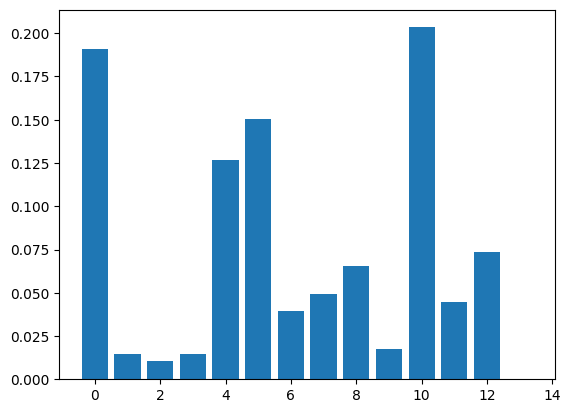

In [160]:
# Plotting feature importances
feature_importances = model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.show()


### Perbandingan antara true label dan predict label

In [161]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': preds.flatten()})
print(comparison.head(20))


       Actual  Predicted
34609       0          0
40474       0          0
24172       0          0
10808       0          0
28144       0          0
3834        0          0
17692       1          1
29841       0          0
39851       0          0
156         0          0
35812       0          0
40952       0          0
42179       0          0
18771       0          0
15053       1          0
34610       0          1
27069       0          0
10001       0          0
30089       1          1
11715       0          0
